In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut,KFold
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error
from sklearn.cross_validation import cross_val_score

/home/david/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/david/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/david/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/david/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/david/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/david/anaconda3/lib/python3.6/site-packages/

In [13]:

X_N=pd.read_csv("nombres_clasificacion.csv")
X_P=pd.read_csv("palabras_clasificacion.csv").head(len(X_N))

#features=["palabra","acen","voc","v_op","v_cl","cons","repet","p_alin","p_cons","v_ini","v_fin"]
X_P["propio"]=np.zeros(X_P.shape[0])
X_N["propio"]=np.ones(X_N.shape[0])
frames=[X_P,X_N]
X_C=pd.concat(frames,sort=False)


H=list(X_C.keys().values)
H=list(filter(lambda x : x != 'propio' and x!="palabra", H))
features=X_C[H]


target=X_C[["propio"]]

In [14]:
X_C.to_csv("listado_clasificacion.csv",index=False)

In [10]:
len(X_N)

367

# Combinada
Ahora se usan la lista de palabras y la de nombres combinadas para intentar predecir si son ombres propios o no.

In [52]:
X=features.values
Y=target.values
trcl=DecisionTreeClassifier()

porcion=[]
acc=[]

for i in range(1,99):
    ix=i/100
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=ix)

    
    trcl.fit(x_train,y_train)
    y_pred=trcl.predict(x_test)
    acc_sc=accuracy_score(y_test,y_pred)
    
    porcion.append(ix)
    acc.append(acc_sc)

    print(str(ix) +" test = "+str(acc_sc))

0.01 test = 0.9285714285714286
0.02 test = 0.8571428571428571
0.03 test = 0.9285714285714286
0.04 test = 0.9272727272727272
0.05 test = 0.927536231884058
0.06 test = 0.9156626506024096
0.07 test = 0.8958333333333334
0.08 test = 0.9181818181818182
0.09 test = 0.8790322580645161
0.1 test = 0.9197080291970803
0.11 test = 0.9139072847682119
0.12 test = 0.9212121212121213
0.13 test = 0.898876404494382
0.14 test = 0.9114583333333334
0.15 test = 0.8980582524271845
0.16 test = 0.9223744292237442
0.17 test = 0.927038626609442
0.18 test = 0.9352226720647774
0.19 test = 0.9346153846153846
0.2 test = 0.9343065693430657
0.21 test = 0.9201388888888888
0.22 test = 0.9269102990033222
0.23 test = 0.9365079365079365
0.24 test = 0.9361702127659575
0.25 test = 0.9298245614035088
0.26 test = 0.9213483146067416
0.27 test = 0.927027027027027
0.28 test = 0.9216710182767625
0.29 test = 0.9219143576826196
0.3 test = 0.9391727493917275
0.31 test = 0.9339622641509434
0.32 test = 0.9155251141552512
0.33 test = 0.9

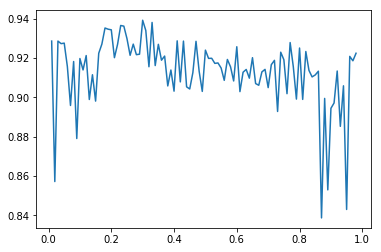

In [53]:
plt.plot(porcion,acc)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)

    
trcl.fit(x_train,y_train)
y_pred=trcl.predict(x_test)
acc_sc=accuracy_score(y_test,y_pred)

In [55]:
trcl.predict(np.array([10,0,0,0,5,2,3,0,5,5,7,0,1,0,2,1,0,0,0,0,0,0,0,0]).reshape(1,-1))

array([1.])

In [56]:
trcl.feature_importances_

array([0.03105494, 0.00200687, 0.00829918, 0.00120035, 0.        ,
       0.01557806, 0.02093743, 0.00912267, 0.00608178, 0.04787493,
       0.04624209, 0.62861934, 0.00557496, 0.01099788, 0.1117234 ,
       0.01581834, 0.01086234, 0.01119906, 0.00540602, 0.00147819,
       0.        , 0.0073881 , 0.        , 0.00253407])

Text(0.5,0,'cons')

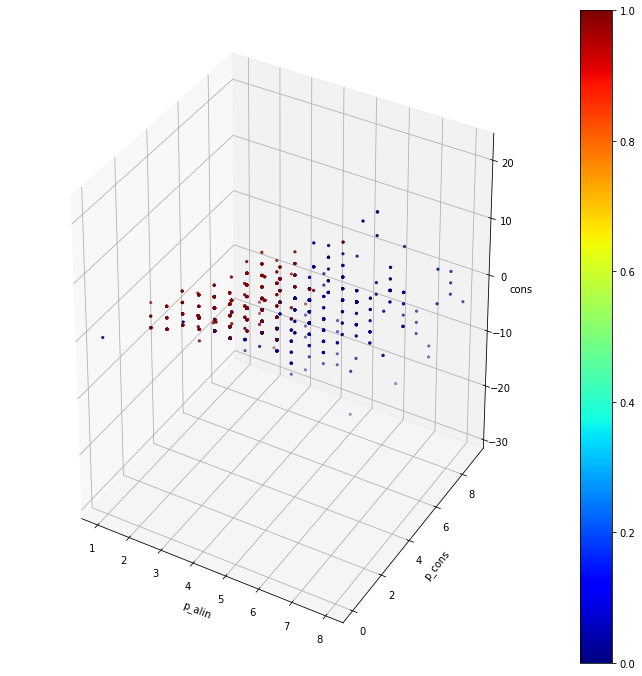

In [57]:
xx=np.array(X_C["voc"])
yy=np.array(X_C["cons"])
zz=np.array(X_C["p_cons"])
cc=np.array(X_C["propio"])
fig=plt.figure(figsize=[12,12])
ax=fig.add_subplot(111,projection='3d')

scat=ax.scatter(xx,yy,zz,c=cc,cmap="jet",s=5)
cm=plt.colorbar(scat)
ax.set_xlabel("p_alin")
ax.set_ylabel("p_cons")
ax.set_zlabel("cons")

In [58]:
confusion_matrix(y_test,y_pred)

array([[392,  19],
       [ 22, 114]])

In [98]:
features=np.array(features)
target=np.array(target)

kf=KFold(n_splits=50,shuffle=True)
kf.get_n_splits(features)

weights=[]
for train_index, test_index in kf.split(features):
       #print("TRAIN:", train_index, "TEST:", test_index)
        x_train, x_test = features[train_index], features[test_index]
        y_train, y_test = target[train_index], target[test_index]
        trcl.fit(x_train,y_train)
        y_pred=trcl.predict(x_test)
        acc_sc=accuracy_score(y_test,y_pred)
        weights.append(trcl.feature_importances_)

In [26]:
confusion_matrix(y_test,y_pred)

array([[384,  15],
       [ 28, 120]])

(array([2., 1., 5., 5., 8., 8., 3., 7., 8., 3.]),
 array([0.01926505, 0.02141054, 0.02355603, 0.02570151, 0.027847  ,
        0.02999249, 0.03213798, 0.03428347, 0.03642896, 0.03857444,
        0.04071993]),
 <a list of 10 Patch objects>)

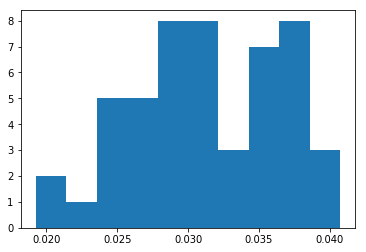

In [112]:
weights=np.array(weights)
plt.hist(weights[:,10],bins=10)

In [67]:
features.values

array([[1, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 1, 0, 0],
       [8, 1, 1, ..., 1, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 1],
       [8, 1, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0]])

In [79]:
kf.split(features)

<generator object _BaseKFold.split at 0x7fdc3627d7d8>